In [1]:
!pip install opencv-python
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2

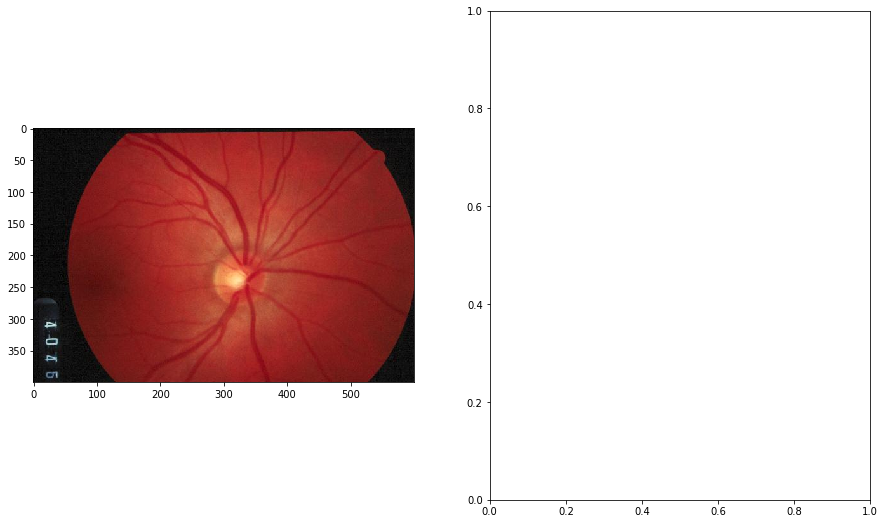

In [2]:
img_001 = cv2.imread('image_001.jpg')

pic1=cv2.cvtColor(img_001, cv2.COLOR_BGR2RGB)


fig, ax = plt.subplots(1,2, figsize = (15,9))
ax[0].imshow(pic1) 


In [3]:
img_001.shape
#img

(400, 600, 3)

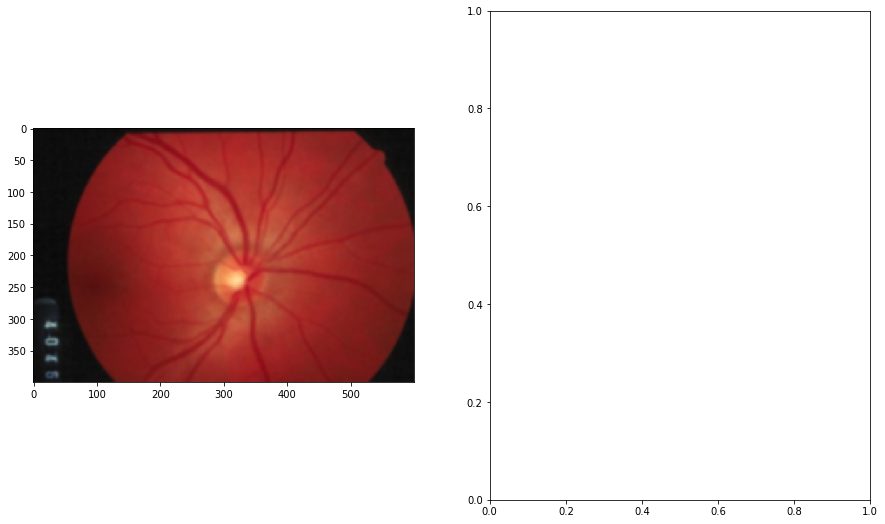

In [4]:
pic1 = cv2.GaussianBlur(pic1, (11,11), 0)

fig, ax = plt.subplots(1,2, figsize = (15,9))
#ax[0].imshow(pic1[:,:,0]) 
#ax[1].imshow(pic2[:,:,2]) 
ax[0].imshow(pic1) 


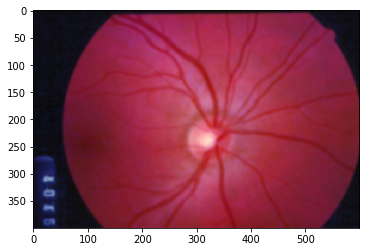

In [5]:
pic1_=cv2.cvtColor(pic1, cv2.COLOR_BGR2RGB)
r,g,b=cv2.split(pic1_)
clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(5,5))
img_rgb= clahe.apply(r)
cnst_pic=cv2.cvtColor(cv2.merge((img_rgb,g,b)), cv2.COLOR_BGR2RGB)
plt.imshow(cnst_pic)

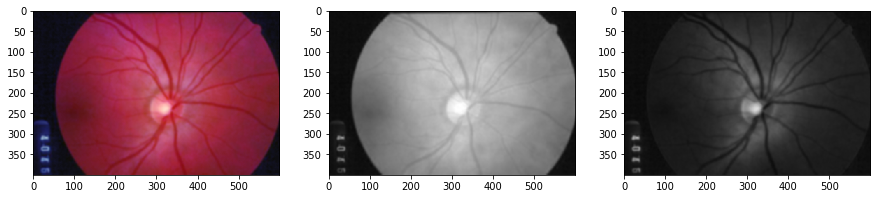

In [6]:
red_channel=cnst_pic[:,:,0]
green_channel=cnst_pic[:,:,1]
cv2.imwrite('image_001r.jpg',red_channel)
cv2.imwrite('image_001g.jpg',green_channel)
img_r = cv2.imread(r'image_001r.jpg')
img_g = cv2.imread(r'image_001g.jpg')
fig, ax = plt.subplots(1,3, figsize = (15,12))
ax[0].imshow(cnst_pic) 
ax[1].imshow(img_r) 
ax[2].imshow(img_g)

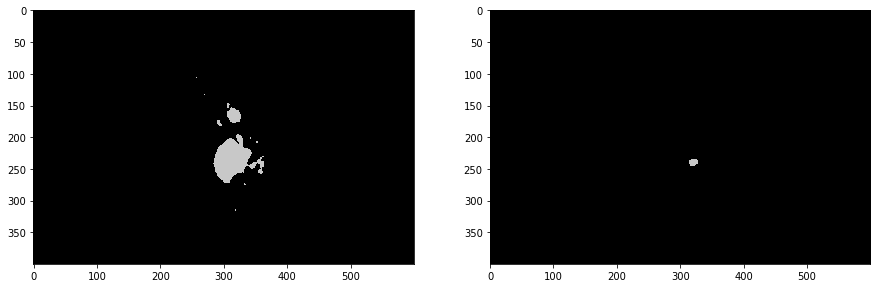

In [7]:
ret,thresh1 = cv2.threshold(img_r,201,200,cv2.THRESH_BINARY)
ret,thresh4 = cv2.threshold(img_g,201,200,cv2.THRESH_BINARY)
fig, ax = plt.subplots(1,2, figsize = (15,9))
ax[0].imshow(thresh1) 
ax[1].imshow(thresh4)

In [8]:
import cv2
import numpy as np

In [9]:
image = cv2.imread('image_001.jpg', cv2.IMREAD_UNCHANGED)

In [12]:
img_2 = image
cv2.waitKey(1000)
cv2.imshow('img', img_2)
cv2.waitKey(10000)
cv2.destroyAllWindows()

In [13]:
#extract red channel
image = image[:,:,2]

In [14]:
cv2.imshow('grayscale', image)
cv2.waitKey(10000)
cv2.destroyAllWindows()

In [15]:
ret, thresh = cv2.threshold(image, 225, 255, cv2.THRESH_BINARY_INV)
cv2.imshow('threshold', thresh)
cv2.waitKey(10000)
cv2.destroyAllWindows()

In [16]:
# dilation
kernel = np.ones((3, 3), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
img_dilation = cv2.bitwise_not(img_dilation)

In [17]:
cv2.imshow('dilated', img_dilation)
cv2.waitKey(10000)
cv2.destroyAllWindows()

In [18]:
# find contours
# cv2.findCountours() function changed from OpenCV3 to OpenCV4: now it have only two parameters instead of 3
cv2MajorVersion = cv2.__version__.split(".")[0]

In [19]:
# check for contours on thresh
if int(cv2MajorVersion) >= 4:
    ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
else:
    im2, ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [20]:
# sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

In [23]:
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)

    # Getting ROI
    roi = image[y:y + h, x:x + w]
    
    # show ROI

    cv2.rectangle(img_2, (x, y), (x + w, y + h), (0, 255, 0), 2)
  
    print((x, y), x + w, y + h)

    if w > 15 and h > 15:
        cv2.imwrite('new1.jpg'.format(i), roi)

(289, 210) 337 256
(292, 253) 294 254
(306, 257) 307 258
(334, 222) 337 224


In [24]:
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)

    area = (w*h/16)*111   ##distance between two latitudes and longitudes is 111 km
    text = str(area) + " Sq.Km"
    if area > 6000:
        cv2.putText(img_2, text, (x,y ), cv2.FONT_HERSHEY_SIMPLEX, .3, (0, 0, 0), lineType=cv2.LINE_AA)

In [26]:
cv2.imshow('marked areas', img_2)
cv2.waitKey(10000)
cv2.destroyAllWindows()